In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/processed_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   batter               217242 non-null  object 
 1   bowler               217242 non-null  object 
 2   non_striker          217242 non-null  object 
 3   runs_by_bat          217242 non-null  int64  
 4   extra_runs           217242 non-null  int64  
 5   total_runs_delivery  217242 non-null  int64  
 6   current_team_total   217242 non-null  int64  
 7   runs_remain          217242 non-null  float64
 8   batter_runs          217242 non-null  int64  
 9   balls_faced          217242 non-null  int64  
 10  wickets_fallen       217242 non-null  int64  
 11  extra_type           217242 non-null  object 
 12  delivery             217242 non-null  float64
 13  over                 217242 non-null  int64  
 14  wicket_type          217242 non-null  object 
 15  player_out       

In [152]:
def get_player_v_bowlers(player_name: str, innings = [1, 2]) -> pd.DataFrame:
	player_data = data.loc[
			(data['batter'] == player_name) & (data['innings'].isin(innings))
		]

	player_data.head()

	# Convert all medium bowlers to fast
	player_data.loc[player_data['bowler_type'] == 'Left arm Medium', 'bowler_type'] = 'Left arm Fast'
	player_data.loc[player_data['bowler_type'] == 'Right arm Medium', 'bowler_type'] = 'Right arm Fast'


	player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out') 


	cols = ['batter', 'non_striker', 'runs_by_bat', 'out', 'won', 'innings', 'over', 'delivery','bowler_type']
	player_data = player_data[cols]

	gp = player_data.groupby('bowler_type')

	player_v_bowler = pd.DataFrame()
	player_v_bowler['strike_rate'] = round(gp['runs_by_bat'].mean() * 100, 2)
	player_v_bowler['strike_rate_std'] = gp['runs_by_bat'].std()
	player_v_bowler['wickets'] = gp['out'].sum()
	player_v_bowler['deliveries_per_wicket'] = round(1 / gp['out'].mean(), 3)
	player_v_bowler['deliveries'] = gp.size()
	return player_v_bowler

get_player_v_bowlers('V Kohli')

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


,strike_rate,strike_rate_std,wickets,deliveries_per_wicket,deliveries
bowler_type,,,,,
Left arm Fast,132.18,1.578236,13,28.923,376
Left arm Orthodox,115.62,1.376721,4,72.000,288
Left arm Wrist spin,129.27,1.249878,2,20.500,41
Right arm Fast,144.89,1.605069,36,39.917,1437
Right arm Legbreak,124.75,1.406514,11,36.727,404
Right arm Offbreak,119.70,1.418717,5,66.000,330


C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


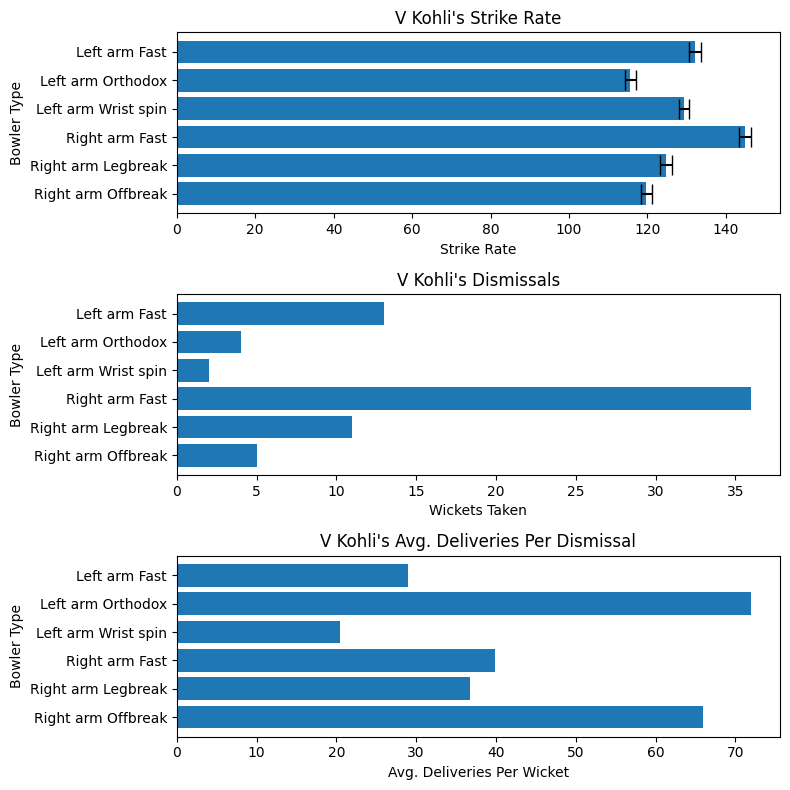

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


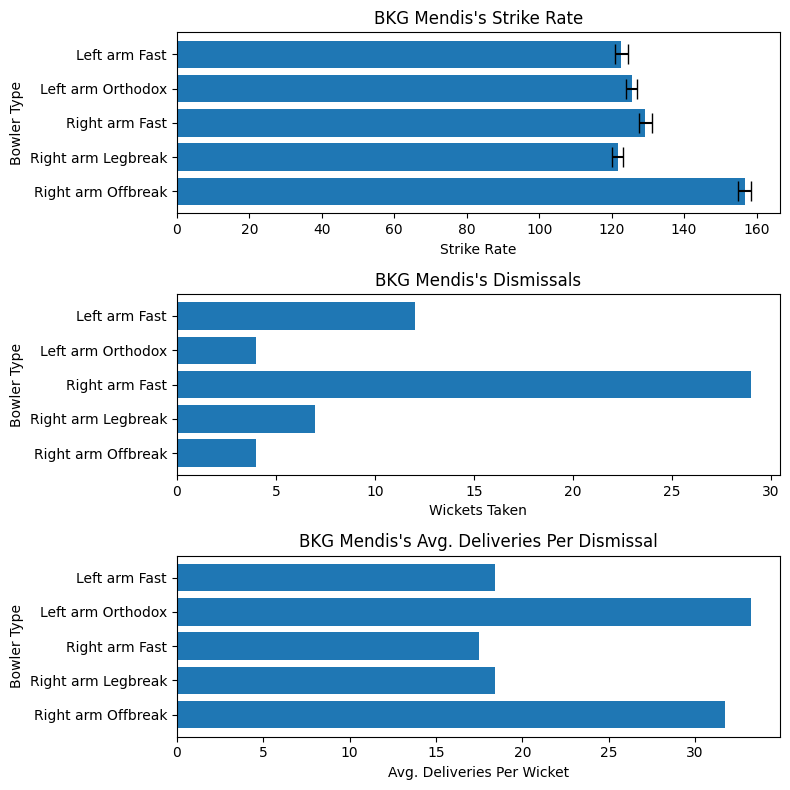

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


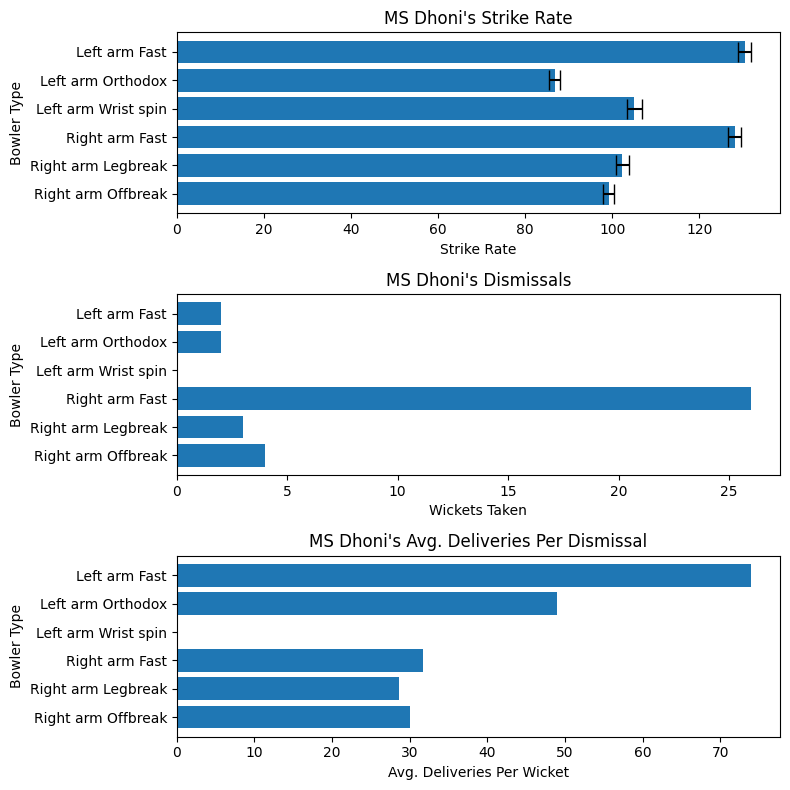

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


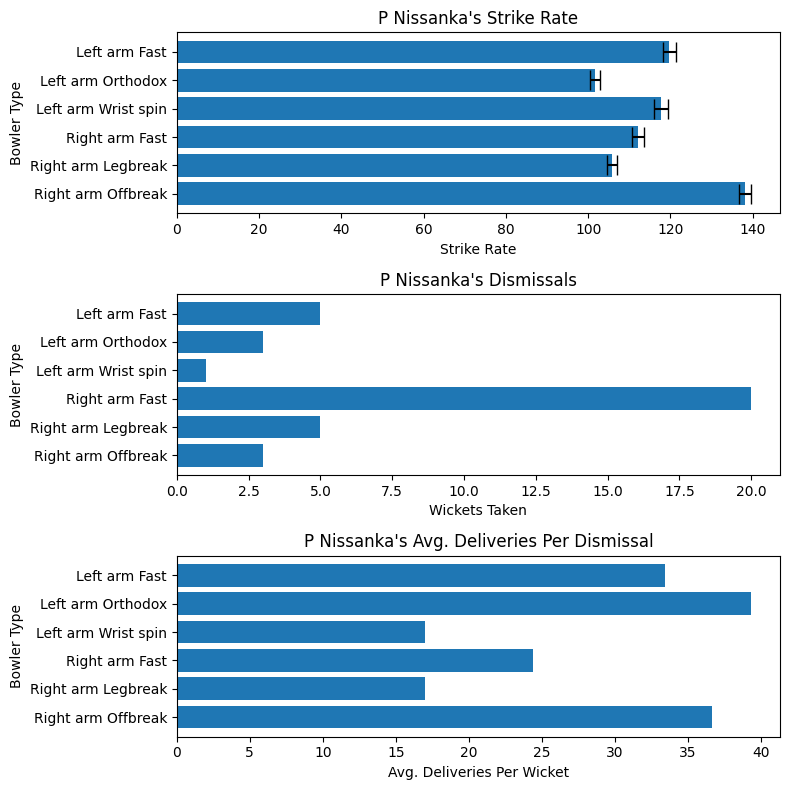

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


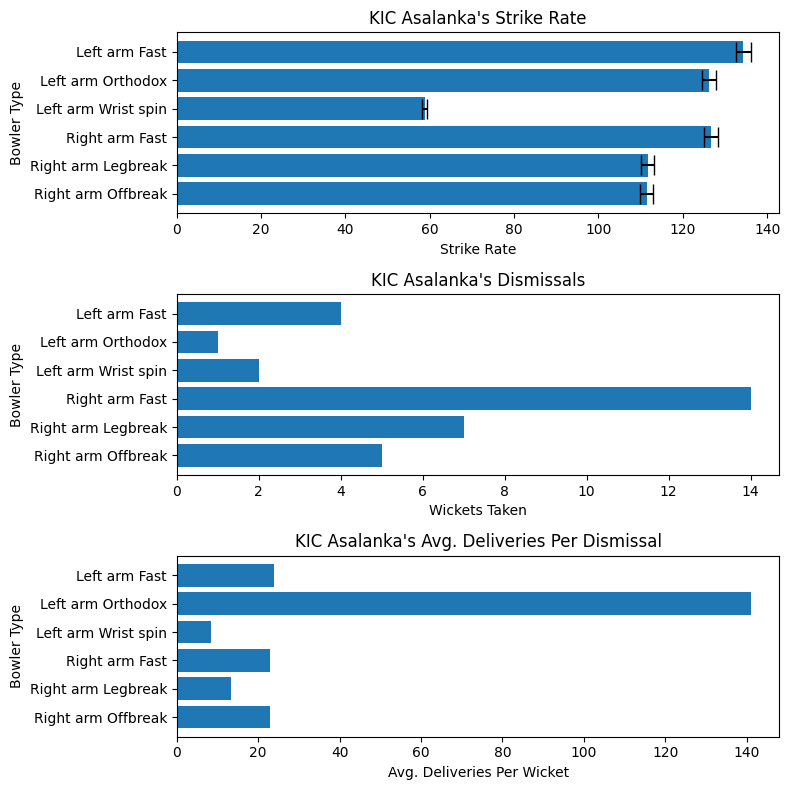

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


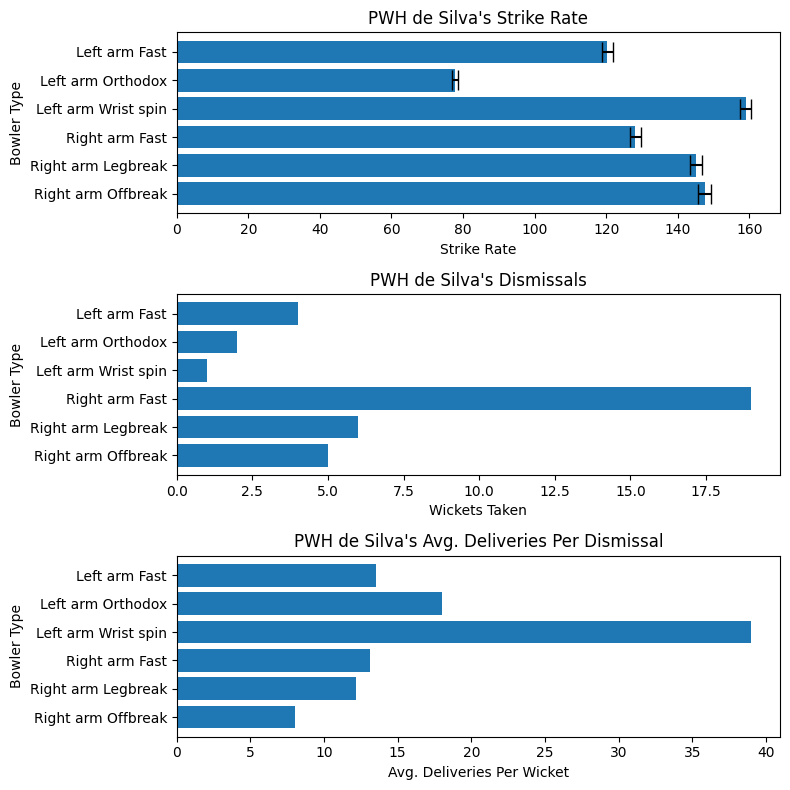

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


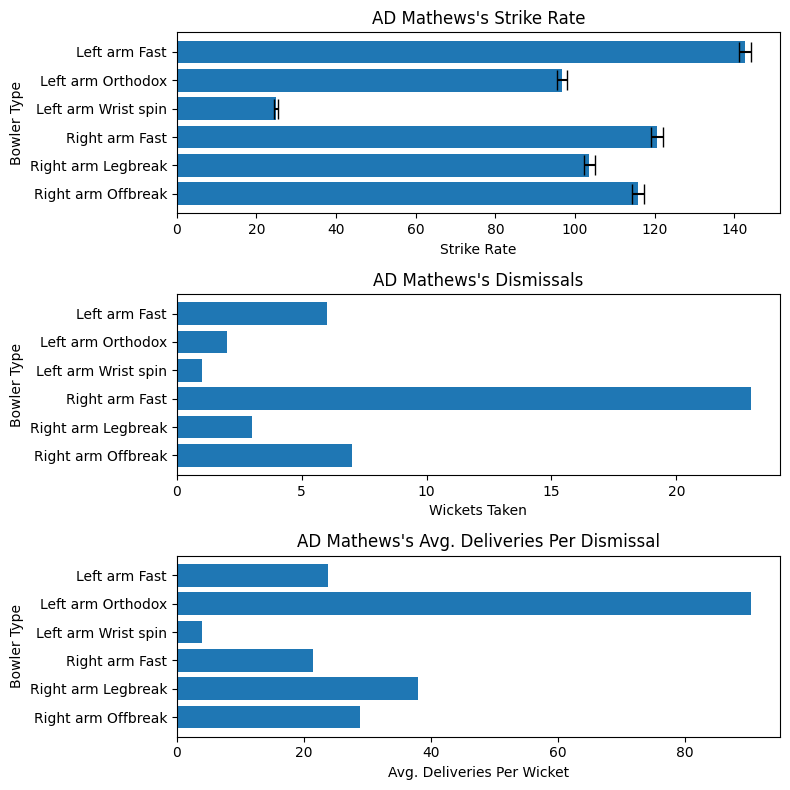

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


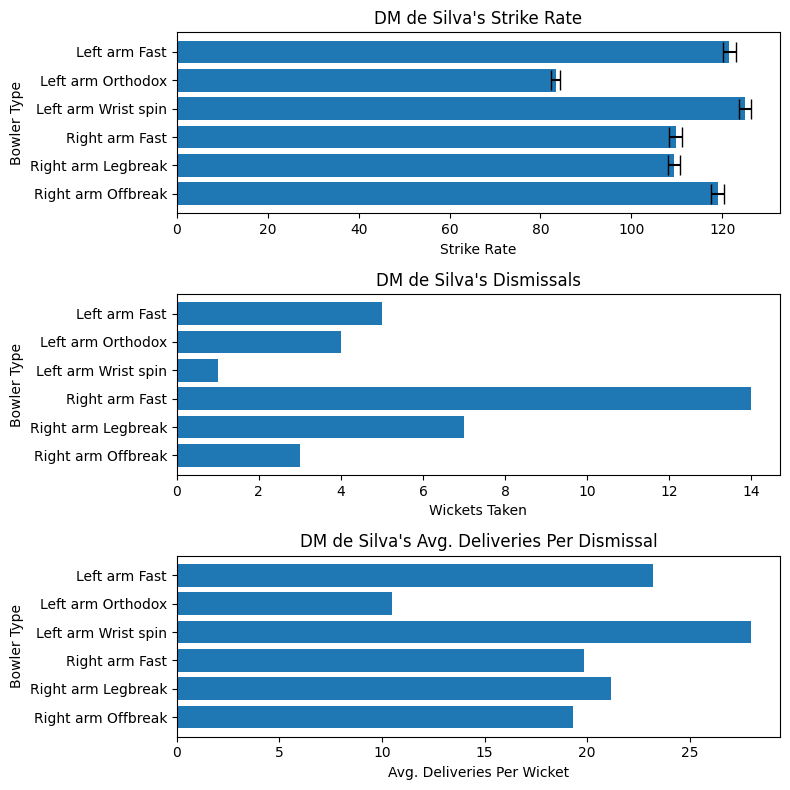

C:\Users\kaush\AppData\Local\Temp\ipykernel_29108\4218268717.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data['out'] = (player_data['wicket_type'] != '0') & (player_data['wicket_type'] != 'run out')


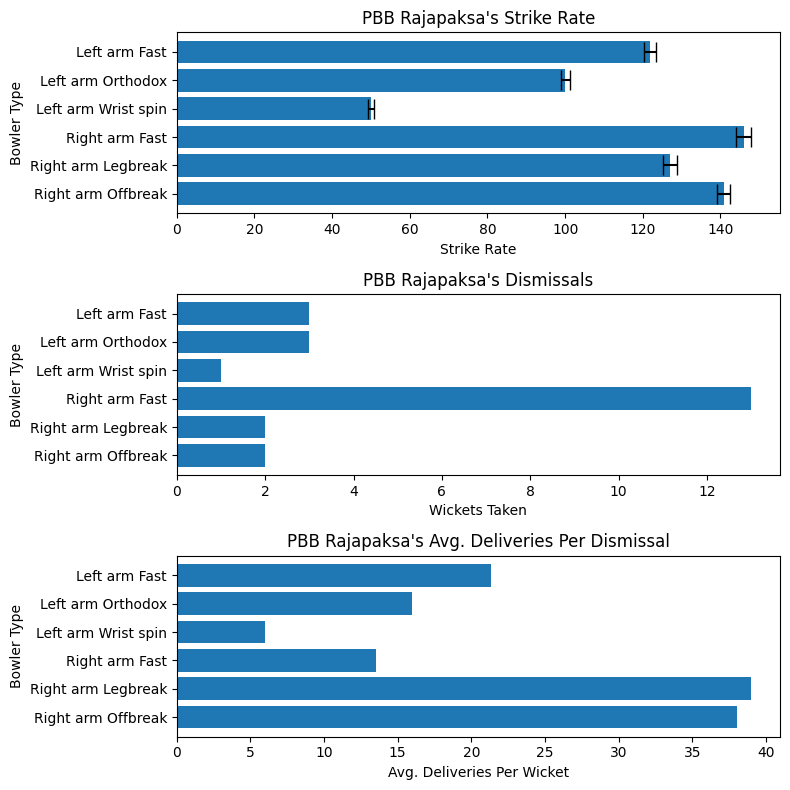

In [160]:
import matplotlib.pyplot as plt
def plot_player_v_bowlers(player_name: str):

    df = get_player_v_bowlers(player_name)
    bowler_types = df.index.to_numpy()  # Get bowler types as labels

    # Create subplots for strike rate and wickets
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 8))

    # Plot strike rate 
    strike_rates = df['strike_rate'].to_numpy()
    error_bars = df['strike_rate_std'].to_numpy()  
    ax1.barh(bowler_types, strike_rates, xerr=error_bars, capsize=7, label='Strike Rate')
    ax1.set_xlabel("Strike Rate")
    ax1.set_ylabel("Bowler Type")
    ax1.set_title(f"{player_name}'s Strike Rate")
    ax1.invert_yaxis()  # Invert y-axis for readability

    # Plot wickets using bar chart
    wickets = df['wickets'].to_numpy()
    ax2.barh(bowler_types, wickets, label='Wickets Taken')
    ax2.set_xlabel("Wickets Taken")
    ax2.set_ylabel("Bowler Type")
    ax2.set_title(f"{player_name}'s Dismissals")
    ax2.invert_yaxis()
    
	
    deliveries_per_wicket = df['deliveries_per_wicket'].to_numpy()
    ax3.barh(bowler_types, deliveries_per_wicket, label='Avg. Deliveries per Wicket')
    ax3.set_xlabel("Avg. Deliveries Per Wicket")
    ax3.set_ylabel("Bowler Type")
    ax3.set_title(f"{player_name}'s Avg. Deliveries Per Dismissal")
    ax3.invert_yaxis()  # Invert y-axis for readability
    plt.tight_layout()
    plt.show()

players = ['V Kohli', 'BKG Mendis', 'MS Dhoni', 'P Nissanka', 'KIC Asalanka',
           'PWH de Silva', 'AD Mathews', 'DM de Silva', 'PBB Rajapaksa']
for player in players:
    plot_player_v_bowlers(player)